<a href="https://colab.research.google.com/github/martinpdab/tugasscdl/blob/main/skenario5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from keras.utils.np_utils import to_categorical

try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
#memakai dataset
URL = 'https://raw.githubusercontent.com/martinpdab/tugasscdl/main/data%20fix.csv' 
dataframe = pd.read_csv(URL)
dataframe

,Period,TE,HU,RF,WS,PD,ABJ,LAG0,LAG1,LAG2,LAG3,LAG4,LAG5,LAG6,LAG7,LAG8,LAG9,LAG10,LAG11,LAG12,OS
0,Jan-10,26.02,84.74,10.52,0.84,792.86,86.96,1,4,6,4,4,1,4,3,3,5,2,1,4,0
1,Feb-10,26.32,84.64,12.04,0.86,793.45,86.72,3,1,4,6,4,4,1,4,3,3,5,2,1,1
2,Mar-10,26.39,85.00,8.65,0.55,794.04,86.50,0,3,1,4,6,4,4,1,4,3,3,5,2,0
3,Apr-10,26.29,86.17,10.37,0.30,794.63,86.28,1,0,3,1,4,6,4,4,1,4,3,3,5,0
4,May-10,26.57,85.61,7.35,0.58,795.22,86.08,0,1,0,3,1,4,6,4,4,1,4,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Aug-18,24.27,76.87,0.00,1.39,846.18,96.29,1,4,3,3,5,2,1,4,1,1,1,2,3,0
104,Sep-18,25.50,75.73,0.59,1.03,846.59,93.34,4,1,4,3,3,5,2,1,4,1,1,1,2,1
105,Oct-18,26.58,74.94,0.04,1.39,847.01,96.10,4,4,1,4,3,3,5,2,1,4,1,1,1,1
106,Nov-18,26.49,82.28,10.53,1.00,847.42,96.38,6,4,4,1,4,3,3,5,2,1,4,1,1,1


In [11]:
#mengambil kolom period, rf, dan os serta mengacak dataset
data = dataframe[['RF', 'OS']]
data = shuffle(data)
data.head()

,RF,OS
36,15.03,0
68,0.00,0
64,3.53,0
79,6.59,0
76,13.48,1


In [17]:
data.describe()
data.isnull().sum()

RF    0
OS    0
dtype: int64

In [14]:
#Splitting data into feature and label
x = data.drop("OS", 1)
y = data["OS"]

#train-test split 80-20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(len(x_train), 'banyak data train')
print(len(x_test), 'banyak data test')

#train-test split 70-30
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.3)
print(len(x_train1), 'banyak data train')
print(len(x_test1), 'banyak data test')

86 banyak data train
22 banyak data test
75 banyak data train
33 banyak data test


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


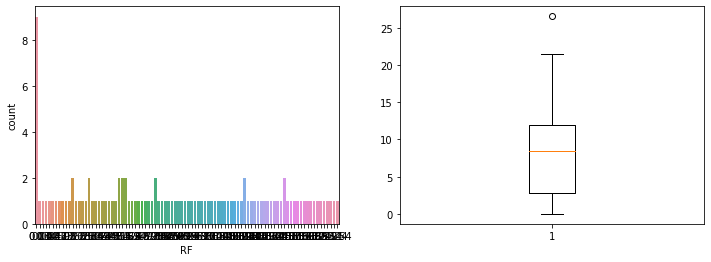

In [8]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(data['RF'])
f.add_subplot(1,2,2)
plt.boxplot(data['RF'])
plt.show()

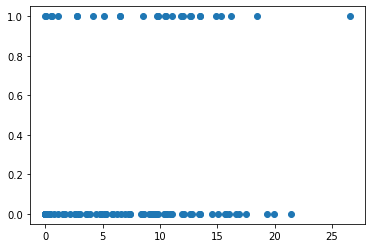

In [18]:
plt.scatter(data['RF'], data['OS'])
plt.show()

In [26]:
model = tf.keras.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [34]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=10, verbose=True)

Epoch 1/100
9/9 [==============================] - 0s 10ms/step - loss: 0.5205 - accuracy: 0.7791 - val_loss: 0.7532 - val_accuracy: 0.5909
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5398 - accuracy: 0.7674 - val_loss: 0.7478 - val_accuracy: 0.5909
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5429 - accuracy: 0.7674 - val_loss: 0.7515 - val_accuracy: 0.5909
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5359 - accuracy: 0.7674 - val_loss: 0.7576 - val_accuracy: 0.5909
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5423 - accuracy: 0.7558 - val_loss: 0.7692 - val_accuracy: 0.5909
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5354 - accuracy: 0.7674 - val_loss: 0.7720 - val_accuracy: 0.5909
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 0.5404 - accuracy: 0.7791 - val_loss: 0.7687 - val_accuracy: 0.5909
Epoch 8/100
9/9 [========

In [36]:
history1=model.fit(x_train1, y_train1, validation_data=(x_test1, y_test1), epochs=100, batch_size=10, verbose=True)

Epoch 1/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6086 - accuracy: 0.6933 - val_loss: 0.5037 - val_accuracy: 0.8182
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6126 - accuracy: 0.7067 - val_loss: 0.5017 - val_accuracy: 0.8182
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6053 - accuracy: 0.7067 - val_loss: 0.5025 - val_accuracy: 0.8182
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6061 - accuracy: 0.6933 - val_loss: 0.4994 - val_accuracy: 0.8182
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6339 - accuracy: 0.6933 - val_loss: 0.5001 - val_accuracy: 0.8182
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5993 - accuracy: 0.6933 - val_loss: 0.4971 - val_accuracy: 0.8182
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6300 - accuracy: 0.6933 - val_loss: 0.4994 - val_accuracy: 0.8182
Epoch 8/100
8/8 [=========